# Import Libraries #

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

# Load Dataset #

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr.shape

(14999, 10)

In [7]:
hr.duplicated().sum()

3008

In [8]:
hr.drop_duplicates(inplace=True)

In [9]:
hr.duplicated().sum()

0

In [10]:
hr.shape

(11991, 10)

In [12]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [13]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [14]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# **Short EDA of the dataset** #

In [15]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
left = hr[hr.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
retained = hr[hr.left==0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


<Axes: xlabel='salary'>

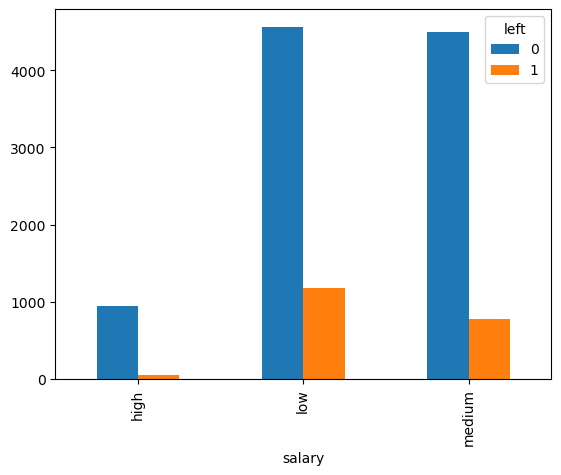

In [25]:
pd.crosstab(hr.salary, hr.left).plot(kind = "bar")

Here it shows that the variables have a direct and clear 
impact on employee retention(i.e.it shows that the estimated number of employees who continue to work is more than thoserwho chose toy leave the compan irrespective of the salary (high, low, medium)

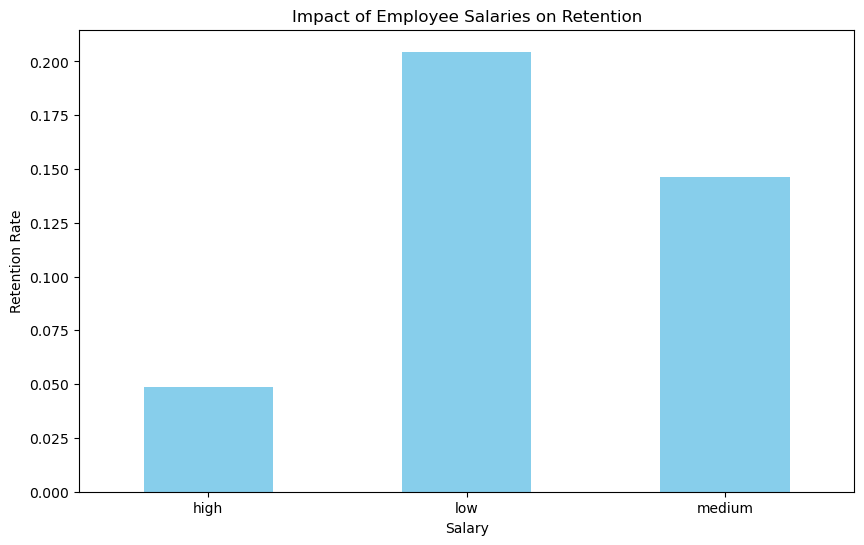

In [30]:
# to plot bar charts showing the impact of employee salaries on retention
#group salary and left
new_salary = hr.groupby('salary')['left'].mean()

#then plot the bar chart
plt.figure(figsize=(10, 6))
new_salary.plot(kind='bar', color='skyblue') 
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary')
plt.ylabel('Retention Rate')
plt.xticks(rotation=0)
plt.show()

Here, it's evident that the influence of employee salaries on retention stems from the company's low salary rates.

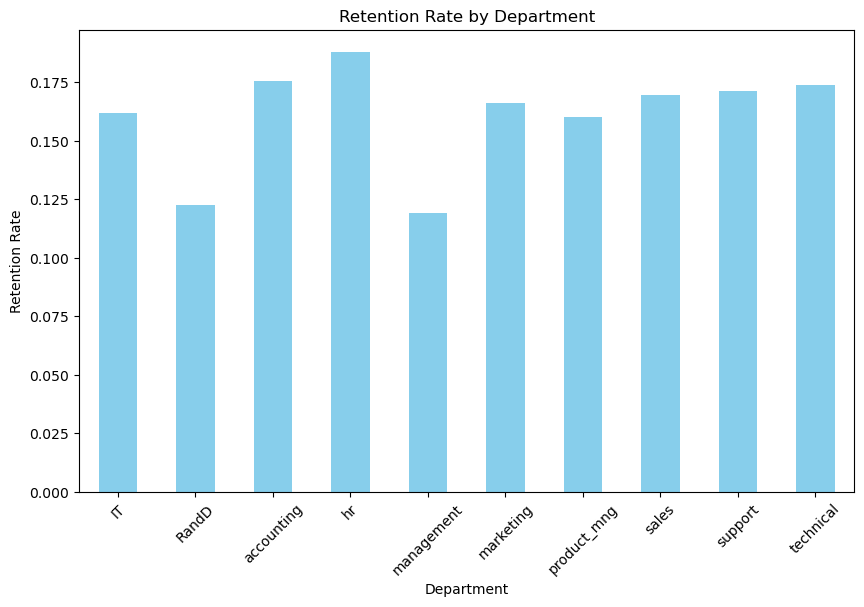

In [32]:
# to plot bar charts showing the correlation between department and employee retention
#group department and left
retention_by_department = hr.groupby('Department')['left'].mean()

#then plot the bar chart
plt.figure(figsize=(10, 6))
retention_by_department.plot(kind='bar', color='skyblue')
plt.title('Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Engineering features

The following are INDEPENDENT VARIABLES: satisfaction_level, salary, average_montly_hours,promotion_last_5years

In [34]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [86]:
sub_hr= hr[["satisfaction_level","average_montly_hours","promotion_last_5years","salary","left"]]
sub_hr.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


Changing the dummy variable (Salary column)

In [87]:
x = pd.get_dummies(sub_hr.salary, prefix="salary", dtype = int)
x

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
11995,1,0,0
11996,1,0,0
11997,1,0,0
11998,1,0,0


In [88]:
hr_dummy = pd.concat([sub_hr,salary_dummy], axis = "columns")
hr_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [89]:
hr_dummy.drop("salary", axis = "columns", inplace = True)
hr_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


Tranning and testing of dataset: Tranning = 70 and Testing = 30

In [90]:
# Select features and target variable
x = hr_dummy[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium']]
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
11995,0.90,259,1,1,0,0
11996,0.74,266,1,1,0,0
11997,0.85,185,1,1,0,0
11998,0.33,172,1,1,0,0


In [92]:
y = hr_dummy['left']  
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [108]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.75)

In [109]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
10791,0.80,194,0,0,0,1
11839,0.49,161,0,0,0,1
6874,0.57,177,0,0,1,0
3450,0.89,232,0,0,1,0
900,0.78,271,0,0,1,0
...,...,...,...,...,...,...
2168,0.80,136,0,0,0,1
1708,0.79,257,0,0,0,1
9269,0.68,227,0,0,0,1
10815,0.83,247,0,0,0,1


In [110]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
6524,0.99,229,0,0,0,1
5850,0.83,150,0,0,1,0
4343,0.72,137,0,0,1,0
356,0.41,154,0,0,1,0
5767,0.59,191,0,0,1,0
...,...,...,...,...,...,...
2636,0.81,108,0,0,0,1
4282,0.89,194,0,0,0,1
6015,0.51,154,0,0,0,1
314,0.10,268,0,0,1,0


In [111]:
y_train

10791    0
11839    0
6874     0
3450     0
900      1
        ..
2168     0
1708     1
9269     0
10815    0
5023     0
Name: left, Length: 8993, dtype: int64

In [112]:
y_test

6524    0
5850    0
4343    0
356     1
5767    0
       ..
2636    0
4282    0
6015    0
314     1
8707    0
Name: left, Length: 2998, dtype: int64

In [113]:
X_train, X_test, y_train, y_test

(       satisfaction_level  average_montly_hours  promotion_last_5years  \
 10791                0.80                   194                      0   
 11839                0.49                   161                      0   
 6874                 0.57                   177                      0   
 3450                 0.89                   232                      0   
 900                  0.78                   271                      0   
 ...                   ...                   ...                    ...   
 2168                 0.80                   136                      0   
 1708                 0.79                   257                      0   
 9269                 0.68                   227                      0   
 10815                0.83                   247                      0   
 5023                 0.98                   145                      0   
 
        salary_high  salary_low  salary_medium  
 10791            0           0              1  


In [114]:
len(X_test)

2998

In [115]:
len(y_train)

8993

In [116]:
# Initialize logistic regression model
model = LogisticRegression()
model

LogisticRegression()

In [117]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [120]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [121]:
model.score(X_test, y_test)

0.8512341561040694

In [122]:
model.coef_ 

array([[-3.89860700e+00,  1.81079172e-03, -7.58465248e-01,
        -1.03804858e+00,  6.41966846e-01,  2.35416131e-01]])

In [118]:
#check the accuracy
train_accuracy = model.score(X_train, y_train)
train_accuracy 

0.8591126431669076

In [119]:
test_accuracy = model.score(X_test, y_test)
test_accuracy

0.8512341561040694